In [1]:
import warnings
warnings.filterwarnings('ignore')

## Setting up your environment

In [2]:
#!pip install dask-image scikit-image --upgrade-strategy only-if-needed

## Importing dask-image
When you import dask-image, be sure to use an underscore instead of a dash between the two words.

In [3]:
import dask_image.imread
import dask_image.ndfilters
import dask_image.ndmeasure
import dask.array as da

In [4]:
import dask as dd

We'll also use matplotlib to display image results in this notebook.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Mapping Nearby Galaxies at APO (MaNGA)

Unlike previous SDSS surveys which obtained spectra only at the centers of target galaxies, MaNGA enables spectral measurements across the face of each of ~10,000 nearby galaxies thanks to 17 simultaneous "integral field units" (IFUs), each composed of tightly-packed arrays of optical fibers. MaNGA's goal is to understand the "life history" of present day galaxies from imprinted clues of their birth and assembly, through their ongoing growth via star formation and merging, to their death from quenching at late times.

In [6]:
#!pip install sdss-marvin

In [7]:
#!pip install mpl-scatter-density

In [9]:
from marvin import config
config.setRelease('DR15')

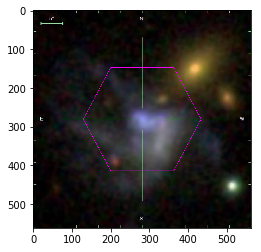

In [10]:
galaxy = dask_image.imread.imread('images/8131-9101.png')
plt.imshow( galaxy[0, ...])

In [11]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) + 
              (rgb[..., 1] * 0.7154) + 
              (rgb[..., 2] * 0.0721))
    return result

dask.array<add, shape=(1, 562, 562), dtype=float64, chunksize=(1, 562, 562)>


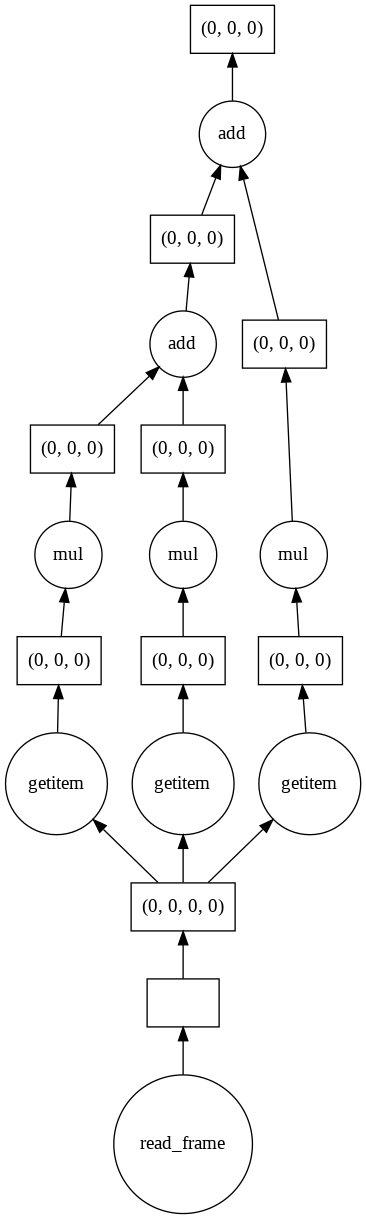

In [12]:
single_image_result = grayscale(galaxy)
print(single_image_result)
single_image_result.visualize()

Original image dimensions:  (1, 562, 562, 4)
Processed image dimensions: (1, 562, 562)


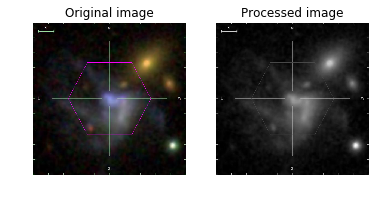

In [13]:
print("Original image dimensions: ",  galaxy.shape)
print("Processed image dimensions:", single_image_result.shape)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
ax0.imshow( galaxy[0, ...])            # display the first (and only) frame of the image
ax1.imshow(single_image_result[0, ...], cmap='gray')  # display the first (and only) frame of the image

# Subplot headings
ax0.set_title('Original image')
ax1.set_title('Processed image')

# Don't display axes
ax0.axis('off')
ax1.axis('off')

# Display images
plt.show(fig)

### Embarrassingly parallel problems

The syntax is identical to apply a function to multiple images or dask chunks. This is an example of an embarrassingly parallel problem, and we see that dask automatically creates a computation graph for each chunk.


In [14]:
# Import the downloadList utility function
from marvin.utils.general import downloadList

In [12]:
%%time
# Make a list of plate-IFUs
gallist = ['8485-1901','8612-1901','8553-9102']

# Download images for the objects in your list
downloadList(gallist, dltype='image')

SDSS_ACCESS> syncing... please wait
SDSS_ACCESS> Done!
CPU times: user 120 ms, sys: 110 ms, total: 230 ms
Wall time: 1min 17s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/sdss_access/20190322_005/sdss_access_02.err' mode='w' encoding='UTF-8'>
  """
/opt/conda/lib/python3.7/subprocess.py:852: ResourceWarning: subprocess 734 is still running
  ResourceWarning, source=self)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/sdss_access/20190322_005/sdss_access_01.err' mode='w' encoding='UTF-8'>
  """
/opt/conda/lib/python3.7/subprocess.py:852: ResourceWarning: subprocess 732 is still running
  ResourceWarning, source=self)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/sdss_access/20190322_005/sdss_access_00.err' mode='w' encoding='UTF-8'>
  """
/opt/conda/lib/python3.7/subprocess.py:852: ResourceWarning: subprocess 731 is still running
  ResourceWarning, source=self)


/opt/conda/lib/python3.7/socket.py:660: ResourceWarning: unclosed <socket.socket fd=56, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.19.0.4', 56764), raddr=('155.101.19.23', 443)>
  self._sock = None


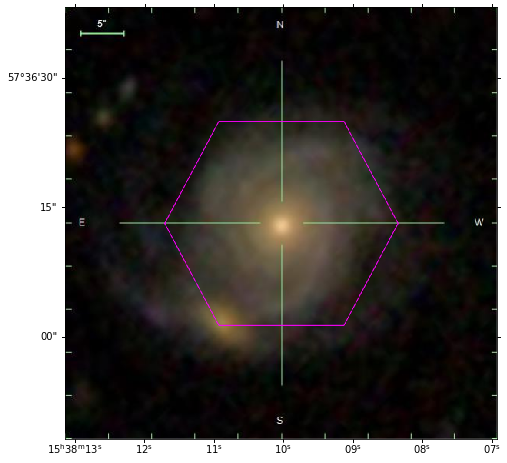

In [15]:
from marvin.tools.image import Image
im = Image('8553-9102')
ax = im.plot()

In [16]:
def IFUfibers(im):
    ax = im.plot()
    # overlay the IFU fibers
    im.overlay_fibers(ax)
    # change the style of the hexagon
    im.overlay_hexagon(ax, color='cyan', linewidth=1)
    return im

In [17]:
images = Image.from_list(['8485-1901','8612-1901','8553-9102'])
images

[<Marvin Image (plateifu='8485-1901', mode='local', data-origin='file')>,
 <Marvin Image (plateifu='8612-1901', mode='local', data-origin='file')>,
 <Marvin Image (plateifu='8553-9102', mode='local', data-origin='file')>]

<Marvin Image (plateifu='8553-9102', mode='local', data-origin='file')>

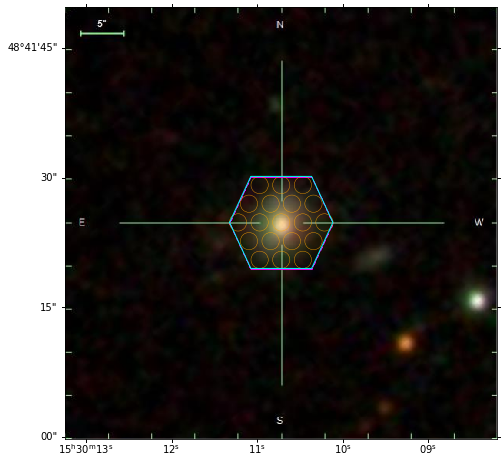

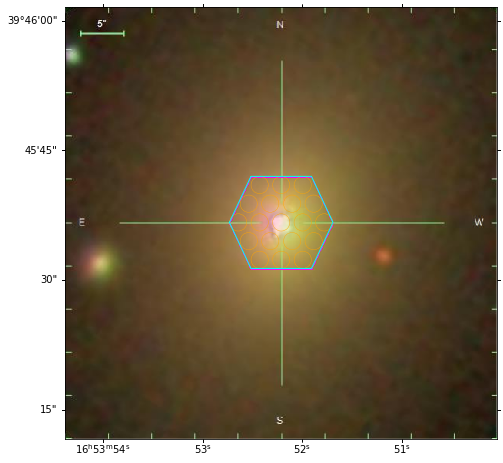

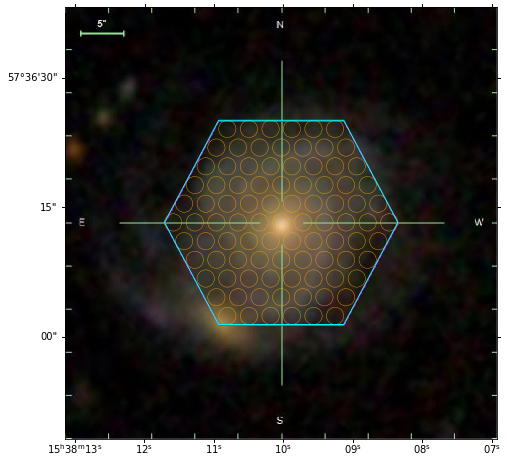

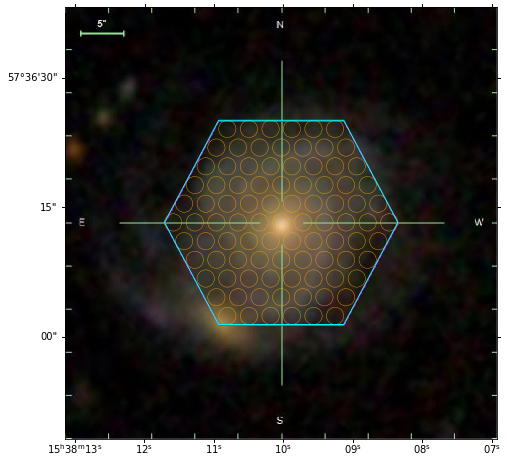

In [18]:
for im in images:
    ax = im.plot()
    im.overlay_fibers(ax)
    im.overlay_hexagon(ax, color='cyan', linewidth=1)
allimages = dd.delayed(IFUfibers)(im)
allimages.compute()

### Referencias
---
https://github.com/dask/dask-tutorial/tree/master/images

https://sdss-marvin.readthedocs.io/en/stable/tools/image.html